In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
!pip install keras_metrics
import keras_metrics

#%cd /content/drive/MyDrive/
batch_size = 128
epochs = 10
latent_dim = 256 # edit LSTM units
num_samples = 14032
data_path = 'min-ind3.txt'


input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, "r", encoding="utf-8") as f:
  lines = f.read().split("\n")
  #print('lines',lines)
print('lines',lines[:len(lines)])
print(len(lines))
for line in lines[:num_samples]:
  if len(line.split(','))==2:
    input_text, target_text = line.split(",")
  # We use "tab" as the "start sequence" character
  # for the targets, and "\n" as "end sequence" character.
  target_text = "\t" + target_text + "\n"
  input_texts.append(input_text)
  target_texts.append(target_text)
  for char in input_text:
      if char not in input_characters:
          input_characters.add(char)
  for char in target_text:
      if char not in target_characters:
          target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print("Number of samples:", len(input_texts))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens), dtype="float32"
)
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype="float32"
)

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, input_token_index[" "]] = 1.0
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.0
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.0
    decoder_input_data[i, t + 1 :, target_token_index[" "]] = 1.0
    decoder_target_data[i, t:, target_token_index[" "]] = 1.0

/content/drive/MyDrive
lines ['nan,yang', 'di,di', 'dari,dari', 'jo,dengan', 'dan,dan', 'ko,ini', 'adolah,adalah', 'langau,nyamuk', 'pado,pada', 'juo,juga', 'bagian,bagian', 'marupokan,merupakan', 'dalam,dalam', 'indonesia,indonesia', 'biasonyo,biasanya', 'spesies,spesies', 'untuak,untuk', 'kelas,kelas', 'famili,famili', 'ordo,ordo', 'filum,filum', 'arthropoda,arthropoda', 'insecta,insecta', 'daun,daun', 'larva,larva', 'diptera,diptera', 'mamakan,memakan', 'herbivora,herbivora', 'dek,karena', 'sabagai,sebagai', 'ka,ka', 'kota,kota', 'taun,tahun', 'ado,ada', 'iko,ini', 'inyo,dia', 'manjadi,menjadi', 'sabuah,sebuah', 'atau,atau', 'kabupaten,kabupaten', 'marupoan,merupakan', 'urang,orang', 'provinsi,provinsi', 'sarato,serta', 'kecamatan,kecamatan', 'barat,barat', 'indak,tidak', 'alah,telah', 'tahun,tahun', 'baliau,beliau', 'padang,padang', 'dapek,dapat', 'itu,itu', 'salah,salah', 'tu,itu', 'satu,satu', 'gadang,besar', 'utara,utara', 'namo,nama', 'nagari,negeri', 'banyak,banyak', 'lain,lai

In [ ]:

################ DON'T RUN THIS CELL FOR BI-LSTM ###################3

encoder_inputs = keras.Input(shape=(None, num_encoder_tokens))
encoder = keras.layers.LSTM(latent_dim, return_state=True)
print(encoder_inputs)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
#encoder_inputs = embedding_layer_input(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c] # hidden and cell state

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))
#decoder_inputs = embedding_layer_output(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)


decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

KerasTensor(type_spec=TensorSpec(shape=(None, None, 34), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")


In [ ]:
latent_dim_1 = 128
latent_dim_2 = 256
latent_dim_3 = 512
encoder_inputs = keras.Input(shape=(None,num_encoder_tokens))
encoder_outputs,forward_h,forward_c,backward_h,backward_c= keras.layers.Bidirectional(keras.layers.LSTM(latent_dim_2, return_state=True),merge_mode='concat',name='encoder_lstm1')(encoder_inputs)
#encoder_outputs = encoder(encoder_inputs)
#print(encoder)
#encoder_outputs = keras.layers.Bidirectional(keras.layers.LSTM(latent_dim_2),merge_mode='concat',name='encoder_lstm2')(encoder)
#print(encoder_outputs)
#encoder_inputs = embedding_layer_input(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [forward_h,forward_c,backward_h,backward_c] # hidden and cell state

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = keras.Input(shape=(None, num_decoder_tokens))
#decoder_inputs = embedding_layer_output(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_outputs,_,_ ,*_= keras.layers.Bidirectional(keras.layers.LSTM(latent_dim_2, return_sequences=True, return_state=True),merge_mode='concat',name='decoder_lstm1')(decoder_inputs, initial_state=encoder_states)
#decoder_outputs, _, _ ,*_= decoder_lstm(decoder_inputs, initial_state=encoder_states)


decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)


Epoch 1/10
77/77 [==============================] - 14s 38ms/step - loss: 1.8481 - accuracy: 0.5741 - recall: 0.3828 - precision: 0.8321 - val_loss: 1.0505 - val_accuracy: 0.7026 - val_recall: 0.5819 - val_precision: 0.9623
Epoch 2/10
77/77 [==============================] - 1s 19ms/step - loss: 0.7923 - accuracy: 0.7708 - recall: 0.6254 - precision: 0.9809 - val_loss: 0.4296 - val_accuracy: 0.9008 - val_recall: 0.7579 - val_precision: 0.9674
Epoch 3/10
77/77 [==============================] - 1s 19ms/step - loss: 0.2444 - accuracy: 0.9576 - recall: 0.8793 - precision: 0.9851 - val_loss: 0.0794 - val_accuracy: 0.9920 - val_recall: 0.9787 - val_precision: 0.9974
Epoch 4/10
77/77 [==============================] - 2s 20ms/step - loss: 0.0418 - accuracy: 0.9977 - recall: 0.9947 - precision: 0.9991 - val_loss: 0.0321 - val_accuracy: 0.9982 - val_recall: 0.9932 - val_precision: 0.9994
Epoch 5/10
77/77 [==============================] - 1s 19ms/step - loss: 0.0162 - accuracy: 0.9993 - recall

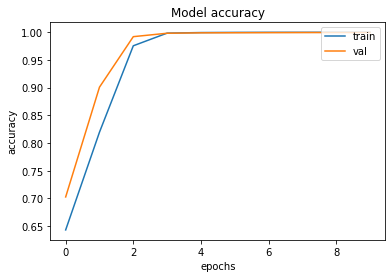

INFO:tensorflow:Assets written to: s2s_1024_f_bidirectional/assets


INFO:tensorflow:Assets written to: s2s_1024_f_bidirectional/assets


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
adam = tf.keras.optimizers.SGD(lr=0.001)
model.compile(
    optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy",keras.metrics.Recall(),keras.metrics.Precision()]
)
results = model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3
)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.legend(['train','val'],loc='upper right')
plt.show()
# Save model
model.save("s2s_1024_f_bidirectional")

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
#%cd /content/drive/MyDrive/
model = keras.models.load_model("s2s_1024_f_bidirectional")

encoder_inputs = model.input[0]  # input_1
encoder_outputs, state_h_enc, state_c_enc,backward_h,backward_c = model.layers[2].output  # lstm_1
encoder_states = [state_h_enc, state_c_enc,backward_h,backward_c]
encoder_model = keras.Model(encoder_inputs, encoder_states)

decoder_inputs = model.input[1]  # input_2
decoder_state_input_h = keras.Input(shape=(latent_dim,), name="input_3")
decoder_state_input_c = keras.Input(shape=(latent_dim,), name="input_5")

decoder_state_backward_h = keras.Input(shape=(latent_dim,), name="input_7")
decoder_state_backward_c = keras.Input(shape=(latent_dim,), name="input_9")
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c,decoder_state_backward_h,decoder_state_backward_c]
decoder_lstm = model.layers[3]
decoder_outputs, state_h_dec,state_c_dec,backward_h_dec,backward_c_dec = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs #, 
)
decoder_states = [state_h_dec, state_c_dec,backward_h_dec,backward_c_dec]
decoder_dense = model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = keras.Model(
    [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    encoder_output,e_h,e_c ,e_h_b = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index["\t"]] = 1.0
    print('Target_sequences',target_seq)
    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ""
    while not stop_condition:
        output_tokens,h,c,h_b,h_c = decoder_model.predict([target_seq] + [encoder_output,e_h,e_c,e_h_b])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if sampled_char == "\n" or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.0

        # Update states
        e_h,e_c,e_h_b = c,h_b,h_c
        #states_value = [h,c,b_h,b_c]
    return decoded_sentence
df = pd.DataFrame()
input_texts_ls = []
decoded_sentences_ls = []
for seq_index in range(50):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index : seq_index + 1]
    #print(input_seq)
    decoded_sentence= decode_sequence(input_seq)
    input_texts_ls.append(input_texts[seq_index])
    decoded_sentences_ls.append(decoded_sentences_ls)
    print("-")
    print("Input sentence:", input_texts[seq_index])
    print("Decoded sentence:", decoded_sentence)
#df['Input sentences'] = input_texts_ls
#df['Decoded sentences'] = decoded_sentences_ls
#df.to_csv('Input_decoded_sentences_without k-fold.csv')

Target_sequences [[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
-
Input sentence: nan
Decoded sentence:                     
Target_sequences [[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
-
Input sentence: di
Decoded sentence:                     
Target_sequences [[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
-
Input sentence: dari
Decoded sentence:                     
Target_sequences [[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
-
Input sentence: jo
Decoded sentence:                     
Target_sequences [[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
-
Input sentence: dan
Decoded sentence:                     
Target_sequences [[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 